![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Numerical Methods in Geotechnical Engineering**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# First steps towards the numerical treatment of ODEs

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import plot_functions.plot_settings

## From algebraic and differential equations

Consider a pore pressure profile given algebraically by:

$$
    p(x) = p_0 + (p_1 - p_0) \left( \frac{x}{L} \right)^2 \quad x \in [0, L]
$$

In [13]:
p = lambda p0, p1, xi: p0 + (p1 - p0) * xi**2

In [14]:
xi = np.linspace(0,1,100)

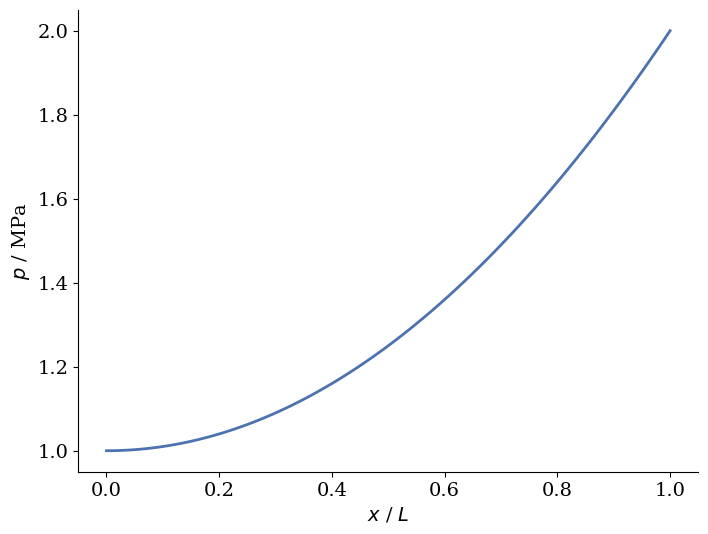

In [15]:
fig, ax = plt.subplots()
ax.plot(xi,p(1,2,xi))
ax.set_xlabel('$x$ / $L$')
ax.set_ylabel('$p$ / MPa');

Usually, however, we understand how systems change due to acting forces, fluxes, etc. Looking at changes rather than absolute expressions one arrives at differential equations. Here, for illustration, we follow the opposite logic and derive our algebraic pressure profile:

$$
    p'=\frac{\mathrm{d}p}{\mathrm{d}x} = 2 (p_1 - p_0) \left( \frac{x}{L} \right)
$$

We notice that this equation describes pressure *changes*. The constant offset $p_0$ is lost upon differentiation. This information, the point of departure of an ODE, needs to be added in the form of an initial or boundary condition. This is equivalent to a treasure map with instructions of the type "100 paces north, 70 paces west, ..." -- to find the treasure, you need to know the point of departure. Let's illustrate this:

In [16]:
dp_dx = lambda p0, p1, xi: 2 * (p1 - p0) * xi

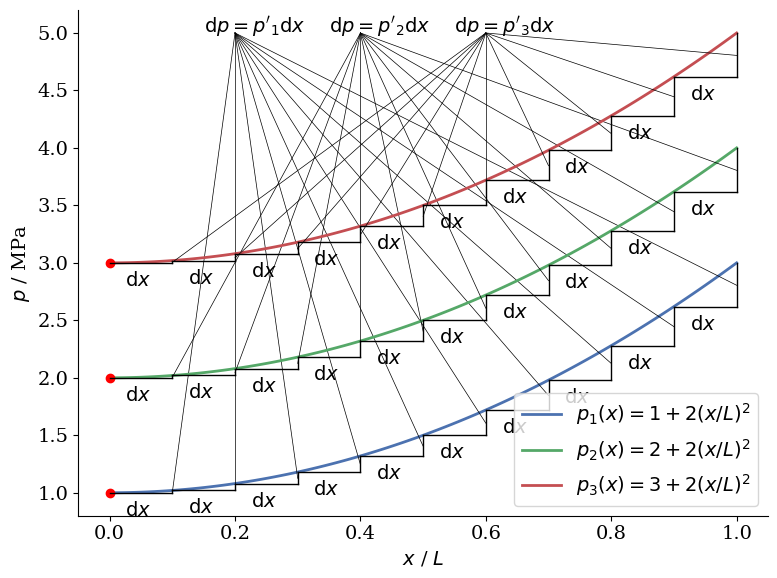

In [46]:
fig, ax = plt.subplots()

for p0 in [1,2,3]:
    ax.plot(xi,p(p0,p0+2,xi),label='$p_{%i}(x) = %i + 2 (x/L)^2$' %(p0,p0))
    ax.plot(0,p0,marker='o',color='red')
    x = 0
    dx = 0.1
    while x+dx < 1:
        ax.plot([x,x+dx],[p(p0,p0+2,x),p(p0,p0+2,x)],color='black',lw=1)
        ax.plot([x+dx,x+dx],[p(p0,p0+2,x),p(p0,p0+2,x+dx)],color='black',lw=1)
        ax.text(x+dx/4,p(p0,p0+2,x)-0.2,'$\\mathrm{d}x$')
        ax.plot([x+dx,0.2*p0],[p(p0,p0+2,x+dx/2),5],color='black',lw=0.5)
        x = x + dx
    ax.text(0.2*p0-0.05,5,"$\\mathrm{d}p = p'_{%i} \mathrm{d}x$" %(p0))
ax.set_xlabel('$x$ / $L$')
ax.set_ylabel('$p$ / MPa')
ax.legend()
fig.tight_layout();

## A more meaningful example: earth pressure with silo effects

Collecting all acting forces and demanding vertical equilibrium of forces:

$$
    \downarrow: \quad \sigma_{zz} \pi r^2 - \left( \sigma_{zz} + \frac{\partial \sigma_{zz}}{\partial z}\text{d}z \right) \pi r^2 + \gamma \pi r^2 \text{d}z - K_0 \sigma_{zz} \tan \delta_\text{s} 2\pi r \text{d}z= 0
$$

Rearranging ... 

$$
    0 = \left( -\frac{\partial \sigma_{zz}}{\partial z} r + \gamma r - 2 K_0 \sigma_{zz} \tan\delta_\text{s}  \right) \pi r \text{d} z
$$

... meaningful solution once term in brackets vanishes. Rearranging a bit again ....

$$
    \frac{\text{d}\sigma_{zz}}{\text{d}z} = \gamma - \frac{2 K_0 \sigma_{zz} \tan \delta_\text{s}}{r}
$$

This is a non-homogeneous, ordinary differential equation of first order with (so far) constant coefficients.

**Tasks:**

- Check the plausibility in terms of $\gamma$, $K_0$, $\tan \delta_\text{s}$ and $r$.
- What is expected to happen with the stress increase at a certain depth?